In [1]:
%matplotlib inline
import skimage.transform
import math
import matplotlib.pyplot as plt
import skimage.data

In [2]:
from mxnet import nd

C:\Users\v-dinliu\AppData\Local\Continuum\anaconda3\envs\mxnet\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
%%time
import sys
sys.path.append('//msralab/projectdata/ehealth02/v-dinliu/Flow2D')
from reader.chairs import binary_reader, trainval
trainSet, validationSet = trainval.read('//msralab/ProjectData/ehealth02/v-dinliu/Flow2D/Data/FlyingChairs_release/FlyingChairs_train_val.txt')
validationSize = len(validationSet)
validationImg1, validationImg2, validationFlow = binary_reader.load(r"\\msralab\ProjectData\ScratchSSD\Users\v-dinliu\data\FlyingChairsBlock", "val")

Wall time: 18.1 s


In [4]:
cd ..

Z:\v-dinliu\Flow2D


In [52]:
import network.flownet 

In [50]:
from importlib import reload

In [56]:
reload(network.flownet)

<module 'network.flownet' from 'Z:\\v-dinliu\\Flow2D\\network\\flownet.py'>

In [27]:
from visualization import flow2rgb
import numpy as np

In [39]:
def call_mx_func(func, *args):
    nd_args = []
    for arg in args:
        if arg.ndim == 3:
            arg = np.expand_dims(arg, 0)
        nd_args.append(nd.transpose(nd.array(arg), (0, 3, 1, 2)))
    nd_ret = func(*nd_args)

    ret = nd.transpose(nd_ret, (0, 2, 3, 1)).asnumpy()
    if ret.shape[0] == 1:
        ret = ret[0]
    return ret

In [83]:
factor = 32

1.9246427


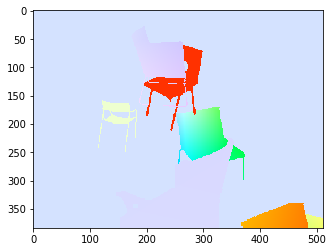

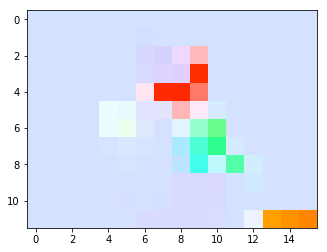

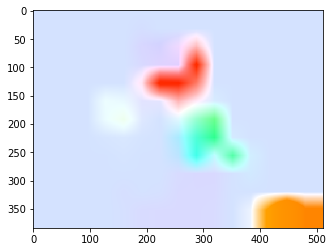

In [84]:
img = validationFlow[14]
plt.figure()
plt.imshow(flow2rgb(img))
plt.figure()
ds_img = call_mx_func(network.flownet.Downsample(factor), img)
upsamp = network.flownet.Upsample(2, factor)
upsamp.collect_params().initialize()
plt.imshow(flow2rgb(ds_img))
plt.figure()
rs_img = call_mx_func(upsamp, ds_img)
plt.imshow(flow2rgb(rs_img))
epe = np.mean(np.linalg.norm(img - rs_img, axis=-1))
print(epe)

In [86]:
import numpy as np

In [101]:
epes = []
orig_epes = []
for i in np.random.choice(range(len(validationFlow)), size=100, replace=False):
    dsflow = call_mx_func(network.flownet.Downsample(factor), validationFlow[i])
    epes.append(np.mean(np.linalg.norm(dsflow, axis=-1)))
    orig_epes.append(np.mean(np.linalg.norm(validationFlow[i], axis=-1)))

In [102]:
print(np.mean(epes))
print(np.mean(orig_epes))

11.7744875
12.197165
